In [1]:
import pandas as pd

df_age = pd.read_csv("train.csv")
df_age.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df_age["Sex"] = labelEncoder.fit_transform(df_age["Sex"])

In [8]:
df_age.set_index("id", inplace=True)
df_age.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


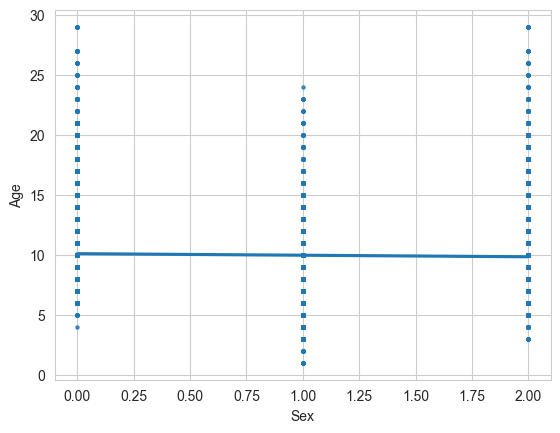

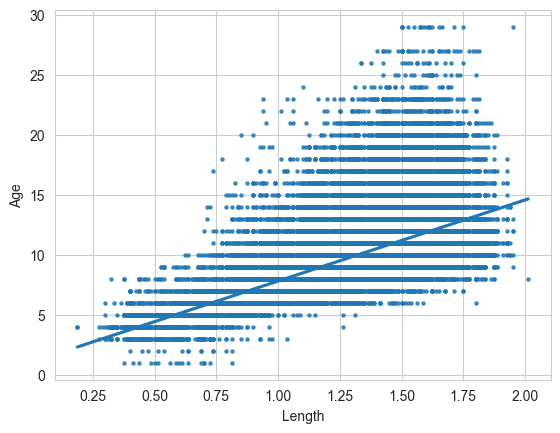

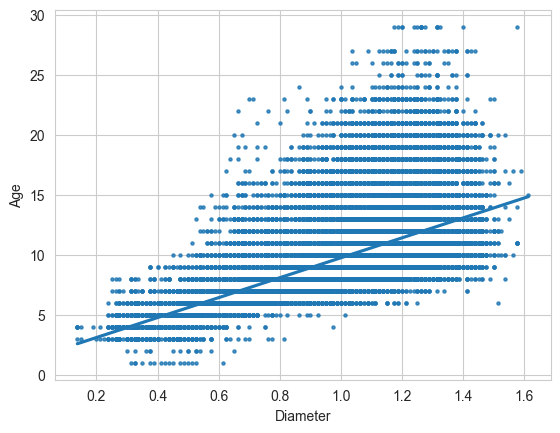

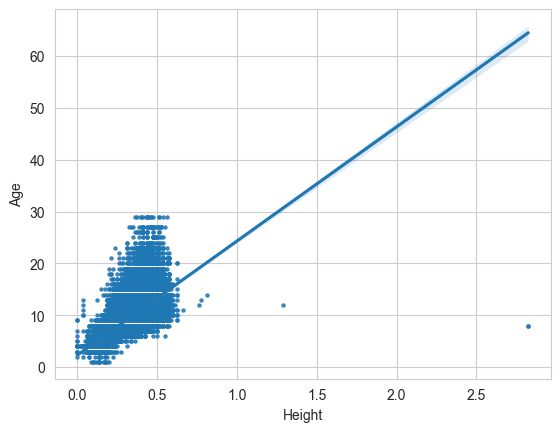

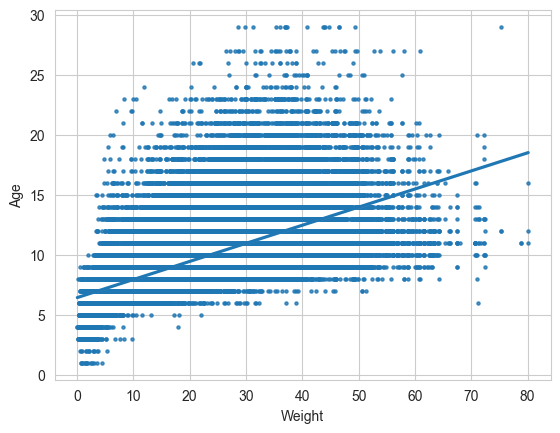

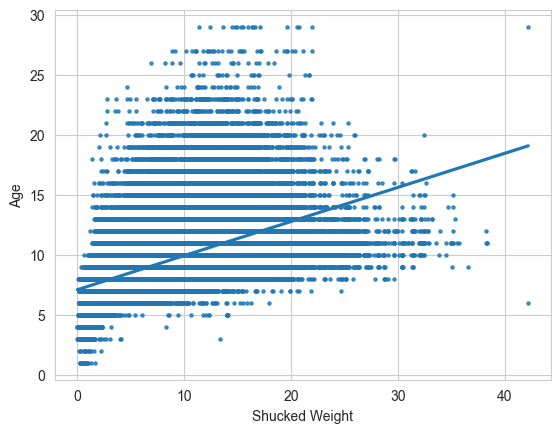

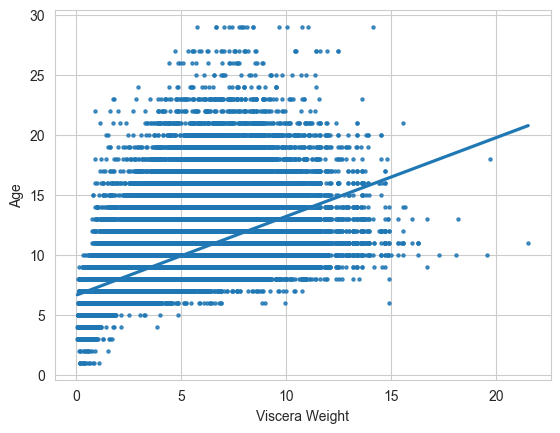

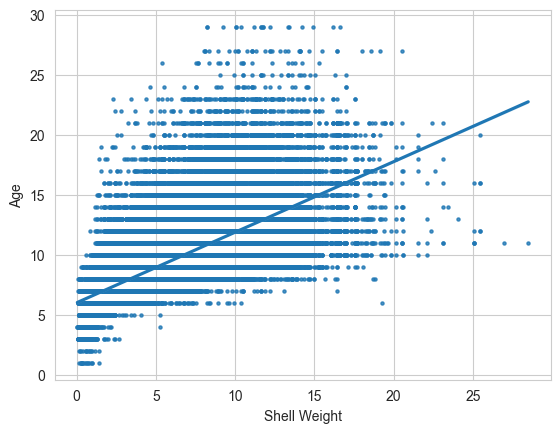

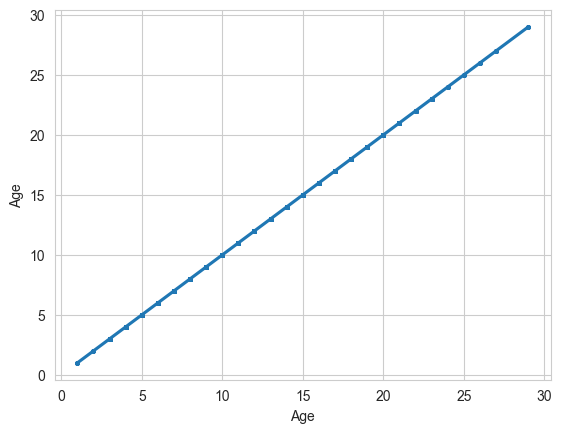

In [12]:
sns.set_style("whitegrid")
for label in df_age.columns.to_list():
    sns.regplot(x=label, y="Age", data=df_age, scatter_kws={"s": 5})
    plt.show()

C:\Users\Aman's Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


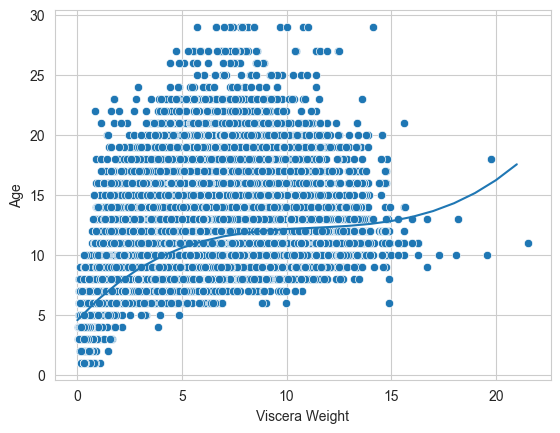

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3)
lre = LinearRegression()
weightPoly  = poly_features.fit_transform(df_age[["Viscera Weight"]])
lre.fit(weightPoly, df_age["Age"])

testData = poly_features.transform(np.arange(0, 22).reshape(-1, 1))
weightGraph = lre.predict(testData)
sns.scatterplot(x="Viscera Weight", y="Age", data=df_age)
plt.plot(range(0, 22), weightGraph)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_age[["Viscera Weight"]])

lre1 = LinearRegression().fit(x_train, y_train)
print(lre1.score(x_test, y_test))

poly_features = PolynomialFeatures(degree=3)
lre = LinearRegression()
weightPoly  = poly_features.fit_transform(df_age[["Viscera Weight"]])
lre.fit(weightPoly, df_age["Age"])




array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [ ]:
features = df_age[["Length", "Shell Weight", "Viscera Weight"]]